**Import Package and Library**

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
import numpy as np

**Load Dataset**

In [2]:
# Paths to training and validation datasets
train_dir = 'dataset/train'

for root, dirs, files in os.walk(train_dir):
    print(root, dirs, files)

dataset/train ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro'] []
dataset/train\Bacterialblight [] ['BACTERAILBLIGHT3_001.jpg', 'BACTERAILBLIGHT3_002.jpg', 'BACTERAILBLIGHT3_003.jpg', 'BACTERAILBLIGHT3_004.jpg', 'BACTERAILBLIGHT3_005.jpg', 'BACTERAILBLIGHT3_006.jpg', 'BACTERAILBLIGHT3_007.jpg', 'BACTERAILBLIGHT3_008.jpg', 'BACTERAILBLIGHT3_009.jpg', 'BACTERAILBLIGHT3_010.jpg', 'BACTERAILBLIGHT3_011.jpg', 'BACTERAILBLIGHT3_012.jpg', 'BACTERAILBLIGHT3_013.jpg', 'BACTERAILBLIGHT3_014.jpg', 'BACTERAILBLIGHT3_015.jpg', 'BACTERAILBLIGHT3_016.jpg', 'BACTERAILBLIGHT3_017.jpg', 'BACTERAILBLIGHT3_018.jpg', 'BACTERAILBLIGHT3_019.jpg', 'BACTERAILBLIGHT3_020.jpg', 'BACTERAILBLIGHT3_021.jpg', 'BACTERAILBLIGHT3_022.jpg', 'BACTERAILBLIGHT3_023.jpg', 'BACTERAILBLIGHT3_024.jpg', 'BACTERAILBLIGHT3_025.jpg', 'BACTERAILBLIGHT3_026.jpg', 'BACTERAILBLIGHT3_027.jpg', 'BACTERAILBLIGHT3_028.jpg', 'BACTERAILBLIGHT3_029.jpg', 'BACTERAILBLIGHT3_030.jpg', 'BACTERAILBLIGHT3_031.jpg', 'BACTERAILBLIGHT3_032.jpg', '

**Display Dataset**

In [3]:
def count_images_in_folder(folder_path):
    count_dict = {}

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)

        if os.path.isdir(subfolder_path):
            num_files = len(os.listdir(subfolder_path))
            count_dict[subfolder] = num_files
    return count_dict

def print_image_counts(base_dir):
    for split in ['train']:
        folder_path = os.path.join(base_dir, split)
        print(f"Count image {split} folder:")
        count_dict = count_images_in_folder(folder_path)

        total_images = sum(count_dict.values())
        print(f"Total image on {split} folder: {total_images}")

        for subfolder, count in count_dict.items():
            print(f"  {subfolder}: {count} images")
        print()

base_dir = 'dataset'

print_image_counts(base_dir)

Count image train folder:
Total image on train folder: 5932
  Bacterialblight: 1584 images
  Blast: 1440 images
  Brownspot: 1600 images
  Tungro: 1308 images



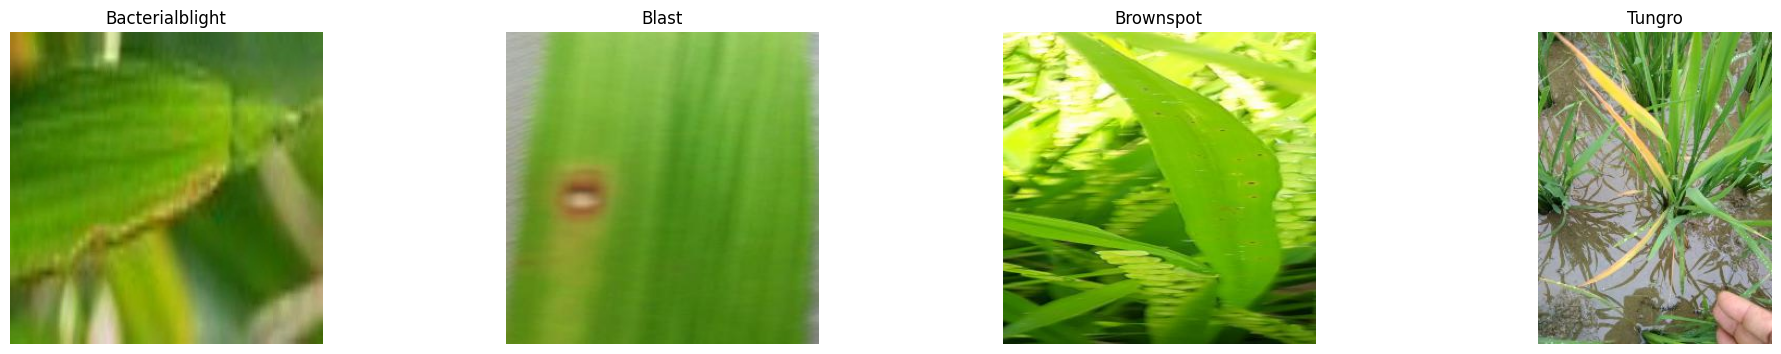

In [4]:
disease_folders = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Make plot for display first image in each class
plt.figure(figsize=(20, 20))


for i, disease_folder in enumerate(disease_folders):
   
    disease_folder_path = os.path.join(train_dir, disease_folder)
    
    
    image_files = os.listdir(disease_folder_path)
    
    if image_files:
        
        first_image_file = image_files[0]
        
       
        first_image_path = os.path.join(disease_folder_path, first_image_file)
        
        
        img = mpimg.imread(first_image_path)
        plt.subplot(6, 4, i + 1)  
        plt.imshow(img)
        plt.title(disease_folder)
        plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()


**Make Data Generator**

In [5]:
# data augmentation generator for the data
datagen = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            validation_split=0.2)

In [6]:
train_ds = datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'categorical',
    subset='training'
)

Found 4747 images belonging to 4 classes.


In [7]:
validation_ds = datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'categorical',
    subset='validation'
)

Found 1185 images belonging to 4 classes.


In [8]:
x_batch, y_batch = next(train_ds)
print(x_batch.shape, y_batch.shape)

(32, 224, 224, 3) (32, 4)


**CNN Model**

In [9]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))



model.summary()

c:\Users\Daniswara Aditya P\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,892 (10.60 MB)

 Trainable params: 2,779,892 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

**Compile Model**

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train Model**

In [20]:
batchsize = 32

history= model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=100,
    steps_per_epoch=len(train_ds) // batchsize
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8865 - loss: 0.2694 - val_accuracy: 0.9055 - val_loss: 0.2573
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.8698 - loss: 0.2991 - val_accuracy: 0.9148 - val_loss: 0.2218
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9167 - loss: 0.2078 - val_accuracy: 0.8920 - val_loss: 0.2818
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.8979 - loss: 0.2295 - val_accuracy: 0.8802 - val_loss: 0.3031
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.8781 - loss: 0.2681 - val_accuracy: 0.8903 - val_loss: 0.2804
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.9146 - loss: 0.3019 - val_accuracy: 0.8700 - val_loss: 0.3213
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.8573 - loss: 0.4058 - val_accuracy: 0.9139 - val_loss: 0.2208
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9010 - loss: 0.2420 - val_accuracy: 0.9013 - val_loss: 0.2647


The total number of epochs that have been carried out are above 500 epochs

**Evaluate Model**

In [21]:
# evaluate the model
loss, model_accuracy = model.evaluate(validation_ds)
loss_train, train_accuracy = model.evaluate(train_ds)

print("Train : accuracy = %f  ;  loss = %f" % (train_accuracy, loss_train))
print("Validation : accuracy = %f  ;  loss = %f" % (model_accuracy, loss))


38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - accuracy: 0.9238 - loss: 0.2100
149/149 ━━━━━━━━━━━━━━━━━━━━ 47s 317ms/step - accuracy: 0.9326 - loss: 0.1775
Train : accuracy = 0.932800  ;  loss = 0.178808
Validation : accuracy = 0.917300  ;  loss = 0.209863


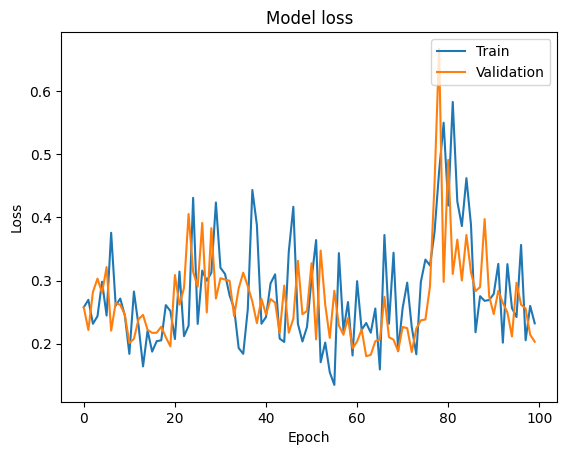

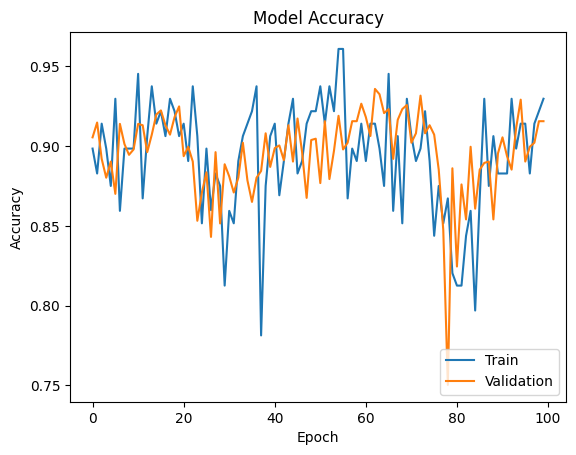

In [22]:
# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

This plot only displays the last 100 epochs

**Save Model**

In [23]:
model.save('Rice-Leaf-Disease.h5')

**Testing**

In [24]:
#labels
class_names = list(train_ds.class_indices.keys())
print(class_names)

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


In [25]:
# Show predictions dan percentage
def predict_class(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    percentage = np.max(predictions)*100
    f_percentage = f"{percentage:.2f}%"
    return predicted_class, f_percentage

# Show image and predictions
def display_prediction(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predict_class(img_path)}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


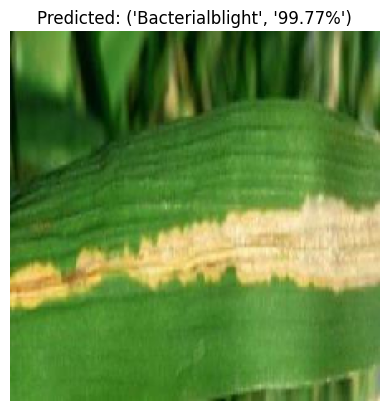

In [26]:
display_prediction('dataset/test/Bacterialblight (1).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


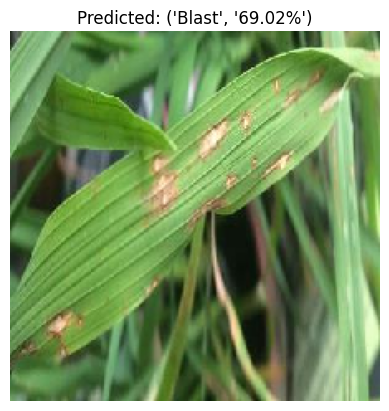

In [27]:
display_prediction('dataset/test/Blast (3).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


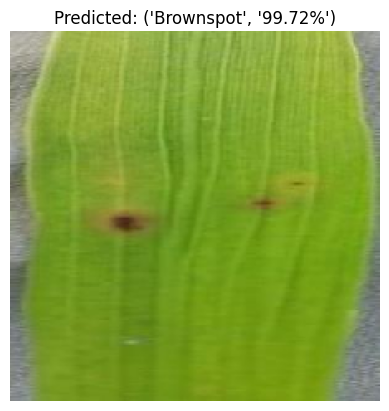

In [28]:
display_prediction('dataset/test/Brownspot (3).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


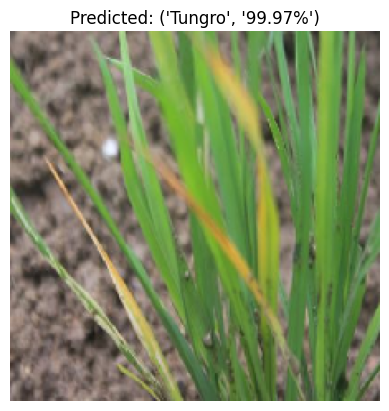

In [29]:
display_prediction('dataset/test/Tungro (2).JPG')